# METADATA

In [2]:
# read metadata tsv file as dataframe  

def read_tsv(tsv_file):
    import pandas as pd
    df = pd.read_csv(tsv_file, sep='\t')
    return df

In [4]:
# takes around 1.5 minutes to read the file
metadata = read_tsv('metadata/metadata.tsv')


<ipython-input-2-49b7cdea924b>:5: DtypeWarning: Columns (1,7,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(tsv_file, sep='\t')


In [5]:
metadata.head()
# print colnames
print(metadata.columns)

Index(['Virus name', 'Last vaccinated', 'Passage details/history', 'Type',
       'Accession ID', 'Collection date', 'Location',
       'Additional location information', 'Sequence length', 'Host',
       'Patient age', 'Gender', 'Clade', 'Pango lineage', 'Pango version',
       'Variant', 'AA Substitutions', 'Submission date', 'Is reference?',
       'Is complete?', 'Is high coverage?', 'Is low coverage?', 'N-Content',
       'GC-Content'],
      dtype='object')


In [6]:
# keep rows with complete and high coverage genome
print(metadata.shape)
metadata_filtered = metadata[(metadata['Is complete?'] == True) & (metadata['Is high coverage?'] == True)]
print(metadata_filtered.shape)

(16691492, 24)
(5871765, 24)


In [7]:
important_columns = ['Virus name', 'Accession ID', 'Variant', 'Pango lineage', 'Clade', 'Collection date', 'Submission date', 'Location', 'Host']

metadata_filtered = metadata_filtered[important_columns].reset_index(drop=True)


metadata_filtered.head()

,Virus name,Accession ID,Variant,Pango lineage,Clade,Collection date,Submission date,Location,Host
0,hCoV-19/Wales/ALDP-C3BB87/2020,EPI_ISL_767225,NaN,B.1.177,GV,2020-12-11,2021-01-05,Europe / United Kingdom / Wales,Human
1,hCoV-19/USA/CA-CZB-23848/2020,EPI_ISL_1185384,NaN,B.1.349,GH,2020-12-19,2021-03-09,North America / USA / California,Human
2,hCoV-19/Wales/ALDP-C3C306/2020,EPI_ISL_767224,NaN,B.1.177,GV,2020-12-10,2021-01-05,Europe / United Kingdom / Wales,Human
3,hCoV-19/Denmark/DCGC-20443/2020,EPI_ISL_759151,NaN,B.1.177.21,GV,2020-12-21,2021-01-03,Europe / Denmark / Midtjylland,Human
4,hCoV-19/Wales/ALDP-C3BA3F/2020,EPI_ISL_767223,NaN,B.1.177.15,GV,2020-12-10,2021-01-05,Europe / United Kingdom / Wales,Human


# FILTERED METADATA

In [8]:
# write the filtered metadata to a tsv file
metadata_filtered.to_csv('metadata/metadata_filtered.tsv', sep='\t', index=False)

In [9]:
# print all unique variants
print(metadata_filtered['Variant'].unique())

[nan 'Former VOC Alpha GRY (B.1.1.7+Q.*) first detected in the UK'
 'Former VOC Omicron GRA (B.1.1.529+BA.*) first detected in Botswana/Hong Kong/South Africa'
 'VOI GRA (XBB.1.5+XBB.1.5.*) first detected in Austria/India/Bangladesh'
 'VUM GRA (XBB+XBB.* excluding XBB.1.5, XBB.1.16, XBB.1.9.1, XBB.1.9.2, XBB.2.3) first detected in India'
 'VOI GRA (XBB.1.16+XBB.1.16.*) first detected in India'
 'VUM GRA (XBB.2.3+XBB.2.3.*) first detected in India/USA'
 'VOI GRA (EG.5+EG.5.*) first detected in Indonesia/France'
 'VUM GRA (CH.1.1+CH.1.1.*) first detected in Austria'
 'VUM GRA (BA.2.75+BA.2.75.*) first detected in India'
 'Former VOC Delta GK (B.1.617.2+AY.*) first detected in India'
 'Former VOC Beta GH/501Y.V2 (B.1.351+B.1.351.2+B.1.351.3) first detected in South Africa'
 'Former VOI Epsilon GH/452R.V1 (B.1.429+B.1.427) first detected in USA/California'
 'Former VOI Zeta GR/484K.V2 (P.2) first detected in Brazil'
 'Former VOC Gamma GR/501Y.V3 (P.1+P.1.*) first detected in Brazil/Japan'


In [10]:
# print all uniqie pango lineages
print(metadata_filtered['Pango lineage'].unique())
print(len(metadata_filtered['Pango lineage'].unique()))
# sort alphabetically and write to a file 
pango_lineages = sorted(metadata_filtered['Pango lineage'].unique())
with open('metadata/pango_lineages.txt', 'w') as f:
    for lineage in pango_lineages:
        f.write(lineage + '\n')

['B.1.177' 'B.1.349' 'B.1.177.21' ... 'BQ.1.1.77' 'DM.1' 'CK.1.3']
3368


TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
# create a csv including only accession id and pango lineage
metadata_filtered[['Accession ID', 'Pango lineage']].to_csv('metadata/accession_pango.csv', index=False)



In [ ]:
import pandas as pd
accession_pango = pd.read_csv("metadata/accession_pango.csv")
accession_pango = accession_pango.rename(columns={'Accession ID': 'accession_id', 'Pango lineage': 'pango_lineage'})
VOC_NAMES = ["Alpha", "Beta", "Delta", "Gamma", "Omicron"]
lineaged = {}

for voc in VOC_NAMES:
    seqs = pd.read_csv(f"data/unique_{voc}_2k.csv")
    seqs_with_lineage = seqs.merge(accession_pango, on='accession_id', how='left')
    lineaged[voc] = seqs_with_lineage

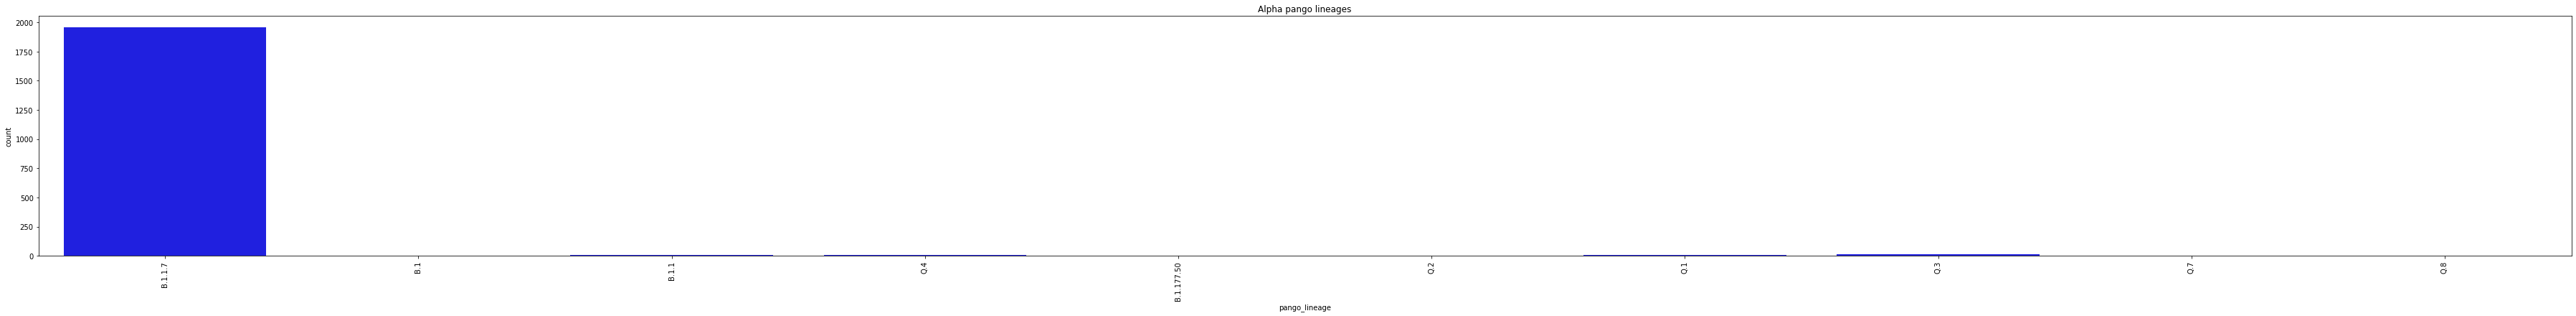

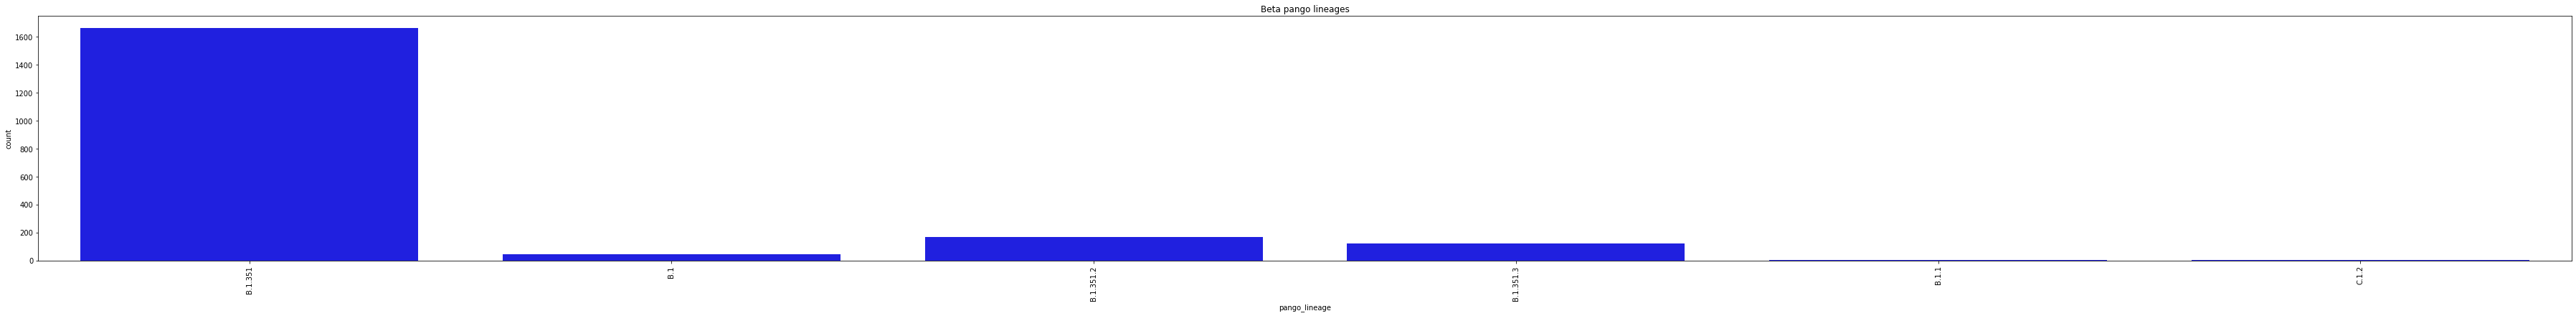

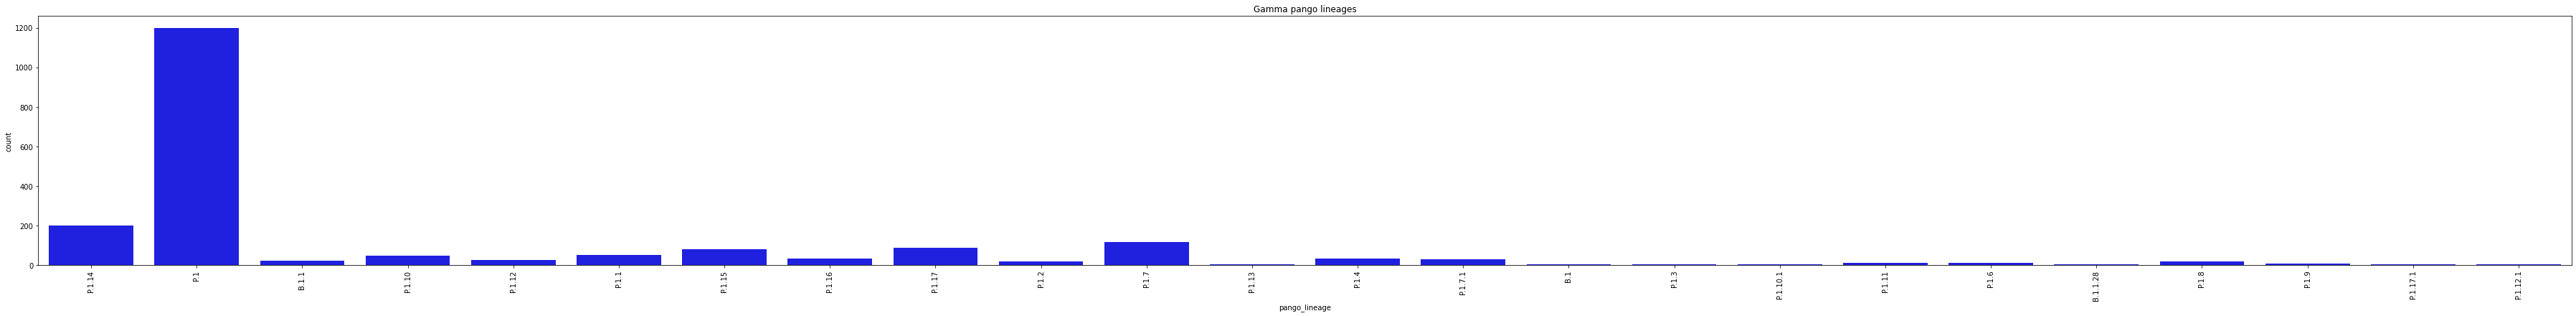

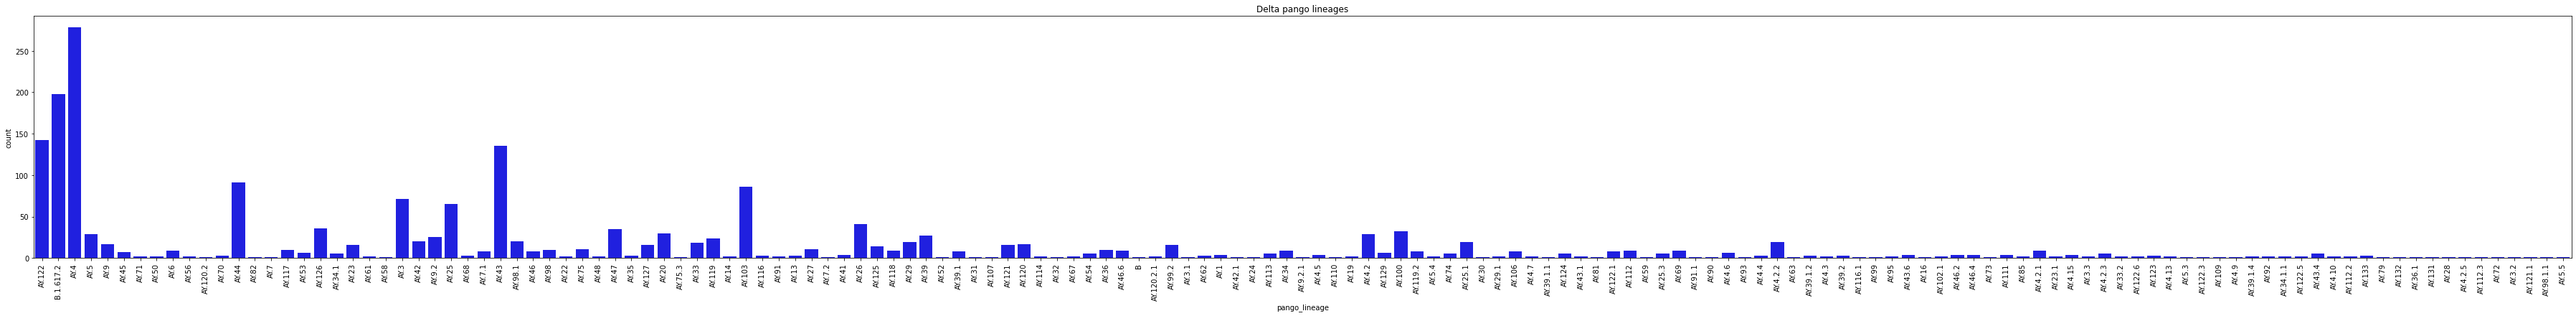

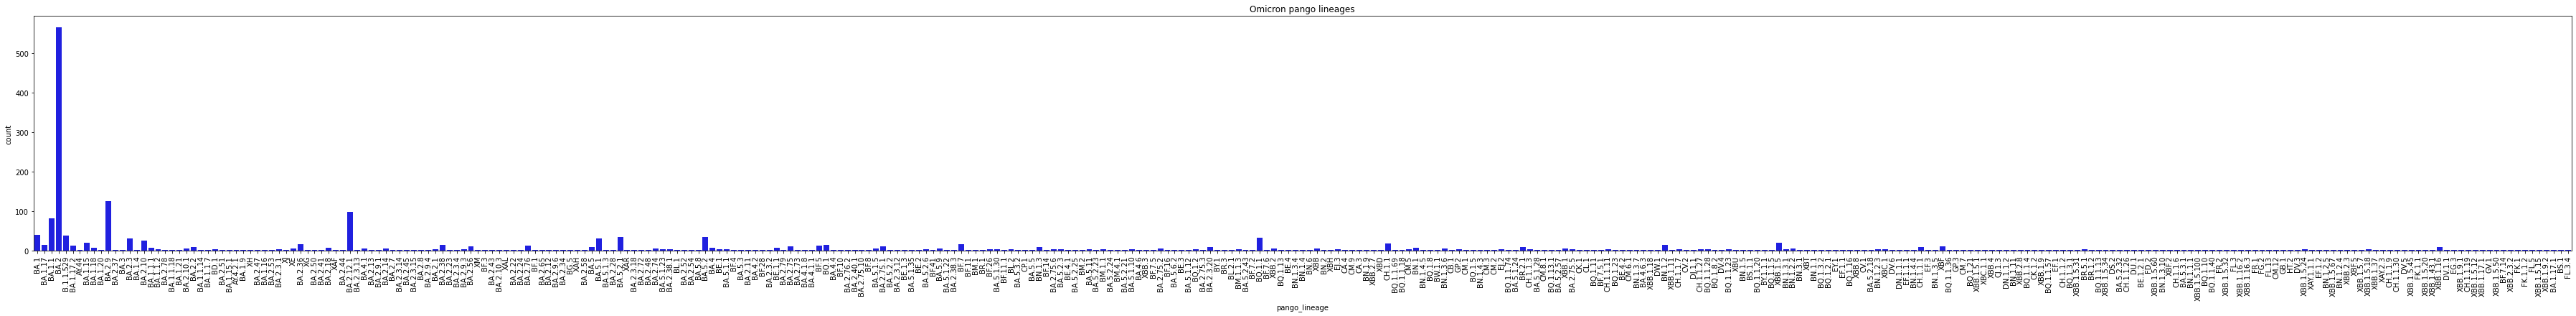

In [ ]:
# plot each variant pango lineages to a different pdf
VOC_NAMES = ["Alpha", "Beta", "Gamma", "Delta", "Omicron"]
import matplotlib.pyplot as plt
import seaborn as sns
for voc in VOC_NAMES:
    plt.figure(figsize=(50, 6))
    sns.countplot(data=lineaged[voc], x='pango_lineage', color='blue')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.title(f'{voc} pango lineages')
    plt.savefig(f'{voc}_pango_lineages.pdf')


In [11]:
eris = 'VOI GRA (EG.5+EG.5.*) first detected in Indonesia/France'

# get accession ids for a specific variant
eris_accession_ids = metadata_filtered[metadata_filtered['Variant'] == eris]['Accession ID'].tolist()

In [12]:
print(len(eris_accession_ids))

6326


# FASTA OPERATIONS

In [21]:
# read fasta file

def read_fasta(fasta_file):
    from Bio import SeqIO
    fasta_sequences = SeqIO.parse(open(fasta_file, encoding="iso-8859-1"), 'fasta')
    return fasta_sequences


fseq = read_fasta('spikeprot0508/spikeprot0508.fasta')

In [16]:
# export 100 random sequences to a fasta file
# import random
# random.seed(0)
# random_fseq = random.sample(list(fseq), 100)
# from Bio import SeqIO
# SeqIO.write(random_fseq, "spikeprot0508/random100.fasta", "fasta")

In [22]:
# reset ID to accession ID (takes around 1.5 minutes)
ids = []
num_acc_id = 0
num_all = 0
for record in fseq:
    num_all += 1
    splitted = record.id.split('|')
    if len(splitted) >= 4:
        ids.append(splitted[3])
        num_acc_id += 1
    else:
        ids.append(record.id)

print(num_acc_id)
print(num_all)

16201093
16740285


In [23]:
# write the fasta file with accession ID as ID (takes around 2.5 minutes)
fseq = read_fasta('spikeprot0508/spikeprot0508.fasta')
with open('spikeprot0508/spikeprot0508_acc.fasta', 'w') as f:
    for i, record in enumerate(fseq):
        f.write('>' + ids[i] + '\n')
        f.write(str(record.seq[:-1]) + '\n')

# FILTERING (Takes around 3 minutes)

In [24]:
fseq_acc = read_fasta('spikeprot0508/spikeprot0508_acc.fasta')
print(next(fseq_acc))

from tqdm.notebook import tqdm
# filtering
SEQ_MIN_LEN = 1235
SEQ_MAX_LEN = 1280
SEQ_MAX_X_COUNT = 13

filtered_fasta = []
num_filtered = 0
with tqdm(total=num_all, desc="Processing sequences") as pbar:
    for record in fseq_acc:
        if record.id[:3] == 'EPI' and len(record.seq) > SEQ_MIN_LEN and len(record.seq) <= SEQ_MAX_LEN and record.seq.count('X') < SEQ_MAX_X_COUNT:
            filtered_fasta.append(record)
            num_filtered += 1
        pbar.update(1)
        
print(num_filtered)

ID: EPI_ISL_402124
Name: EPI_ISL_402124
Description: EPI_ISL_402124
Number of features: 0
Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT')


Processing sequences:   0%|          | 0/16740285 [00:00<?, ?it/s]

11445409


In [25]:
# write the filtered fasta file (takes around 30 seconds)
with open('spikeprot0508/spikeprot0508_acc_filtered.fasta', 'w') as f:
    for record in filtered_fasta:
        f.write('>' + record.id + '\n')
        f.write(str(record.seq) + '\n')

# VARIANT SELECTION (ERIS) Takes around 16 minutes

In [26]:
fseq_acc_filtered = read_fasta('spikeprot0508/spikeprot0508_acc_filtered.fasta')

# get spike protein sequences for a specific variant

from tqdm.notebook import tqdm

# use n in tqdm progress bar to show the number of sequences processed

eris_records = []
with tqdm(total=num_filtered, desc="Processing sequences") as pbar:
    for record in fseq_acc_filtered:
        if record.id in eris_accession_ids:
            eris_records.append(record)
        pbar.update(1)

Processing sequences:   0%|          | 0/11445409 [00:00<?, ?it/s]

In [27]:
print(len(eris_records))

4646


In [28]:
# write the spike protein sequences for a specific variant to a fasta file
with open('spikeprot0508/spikeprot0508_acc_filtered_eris.fasta', 'w') as f:
    for record in eris_records:
        f.write('>' + record.id + '\n')
        f.write(str(record.seq) + '\n')

In [29]:
fseq_eris = read_fasta('spikeprot0508/spikeprot0508_acc_filtered_eris.fasta')

for i in range(5):
    print(next(fseq_eris))

ID: EPI_ISL_17671962
Name: EPI_ISL_17671962
Description: EPI_ISL_17671962
Number of features: 0
Seq('MFVFLVLLPLVSSQCVNLITRTQXXXXYTNSFTRGVYYPDKVFRSSVLHSTHDL...HYT')
ID: EPI_ISL_17671906
Name: EPI_ISL_17671906
Description: EPI_ISL_17671906
Number of features: 0
Seq('MFVFLVLLPLVSSQCVNLITRTQXXXXYTNSFTRGVYYPDKVFRSSVLHSTHDL...HYT')
ID: EPI_ISL_17684409
Name: EPI_ISL_17684409
Description: EPI_ISL_17684409
Number of features: 0
Seq('MFVFLVLLPLVSSQCVNLITRTQXXXXYTNSFTRGVYYPDKVFRSSVLHSTHDL...HYT')
ID: EPI_ISL_17684246
Name: EPI_ISL_17684246
Description: EPI_ISL_17684246
Number of features: 0
Seq('MFVFLVLLPLVSSQCVNLITRTQXXXXYTNSFTRGVYYPDKVFRSSVLHSTHDL...HYT')
ID: EPI_ISL_17696901
Name: EPI_ISL_17696901
Description: EPI_ISL_17696901
Number of features: 0
Seq('MFVFLVLLPLVSSQCVNLITRTQXXXXYTNSFTRGVYYPDKVFRSSVLHSTHDL...HYT')


In [30]:
# get unique sequences for a specific variant
def get_unique_sequences(fasta_file):
    from Bio import SeqIO
    from tqdm.notebook import tqdm
    unique_sequences = []
    unique_ids = []
    for record in SeqIO.parse(open(fasta_file, encoding="iso-8859-1"), 'fasta'):
        if str(record.seq) not in unique_sequences:
            unique_sequences.append(str(record.seq))
            unique_ids.append(record.id)
    return unique_sequences, unique_ids

unique_sequences, unique_ids = get_unique_sequences('spikeprot0508/spikeprot0508_acc_filtered_eris.fasta')

print(len(unique_sequences))

# write the unique sequences to a fasta file
with open('spikeprot0508/spikeprot0508_acc_filtered_eris_unique.fasta', 'w') as f:
    for i, seq in enumerate(unique_sequences):
        f.write('>' + unique_ids[i] + '\n')
        f.write(seq + '\n')


2081


In [32]:
# write to a csv file
import pandas as pd
from Bio import SeqIO

def write_to_csv(fasta_file, csv_file):
    with open(csv_file, 'w') as f:
        f.write('accession_id,sequence\n')
        for record in SeqIO.parse(open(fasta_file, encoding="iso-8859-1"), 'fasta'):
            f.write(record.id + ',' + str(record.seq) + '\n')

write_to_csv('spikeprot0508/spikeprot0508_acc_filtered_eris_unique.fasta', 'spikeprot0508/unique_Eris.csv')

# read the csv file
unique_eris = pd.read_csv('spikeprot0508/unique_Eris.csv')
unique_eris


,accession_id,sequence
0,EPI_ISL_17671962,MFVFLVLLPLVSSQCVNLITRTQXXXXYTNSFTRGVYYPDKVFRSS...
1,EPI_ISL_17671906,MFVFLVLLPLVSSQCVNLITRTQXXXXYTNSFTRGVYYPDKVFRSS...
2,EPI_ISL_17696901,MFVFLVLLPLVSSQCVNLITRTQXXXXYTNSFTRGVYYPDKVFRSS...
3,EPI_ISL_17697639,MFVFLVLLPLVSSQCVNLITRTQXXPAYTNSFTRGVYYPDKVFRSS...
4,EPI_ISL_17714314,MFVFLVLLPLVSSQCVNLITRTQXXXXYTNSFTRGVYYPDKVFRSS...
...,...,...
2076,EPI_ISL_19078958,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...
2077,EPI_ISL_19080758,MFVFLVLLPLVSSQCVNLITRTQXXXXXXXXXXXXVYYPDKVFRSS...
2078,EPI_ISL_19085486,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...
2079,EPI_ISL_19085492,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...
